### Gender Classification using Logistic Regression Model

The main objective of this notebook is to see how logistic regression is used together along with a gender classification dataset that contains about 58,000 male and female images that are 

### Requirements from Rubric (dont delete muna)

An overview or description of the data is provided, including how it was collected, and its implications on the types of conclusions that could be made from the data. A description of the variables, observations, and/or structure of the data is provided. The target task is well introduced and clearly defined.

The data is sufficiently explored to get a grasp of the distribution and the content of the data. Appropriate summaries and visualizations are presented. Insights into how the EDA can help the model training is mentioned.

The necessary steps for preprocessing and cleaning are performed, including explanations for every step. If no preprocessing or cleaning is done, there is a justification on why it was not needed.

The appropriate models are used to accomplish the machine learning task. Justification of choosing the models is shown.

Appropriate data-driven error analysis is made, and changes to the model selection and hyperparameters are performed to improve model performance. The study exhausts improvements that can be done to the model

The study is concluded by effectively summarizing the efforts of the authors. Recommendations on how the model could be further improved are provided.

### About the Dataset

The Gender Classification Dataset 

In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import BatchNormalization

from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis

from glob import glob
from keras.models import Model
from keras.layers import Input, Lambda, Dense, Flatten

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch 

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

Working with 23766 images
Working with 23243 images
Working with 5808 images
Working with 5841 images
090544.jpg.jpg


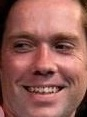

131422.jpg.jpg


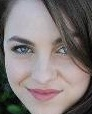

063429.jpg.jpg


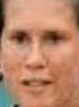

112944.jpg.jpg


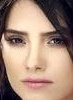

090545.jpg.jpg


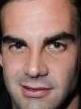

131423.jpg.jpg


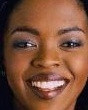

063430.jpg.jpg


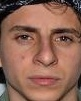

112950.jpg.jpg


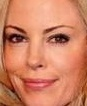

090548.jpg.jpg


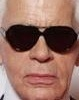

131425.jpg.jpg


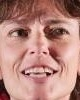

063438.jpg.jpg


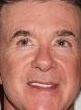

112953.jpg.jpg


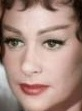

In [2]:
tm_path = './train/male'
tf_path = './train/female'
vm_path = './valid/male'
vf_path = './valid/female'

male_train = [f for f in os.listdir(tm_path) if os.path.isfile(os.path.join(tm_path, f))]
print("Working with {0} images".format(len(male_train)))

female_train = [f for f in os.listdir(tf_path) if os.path.isfile(os.path.join(tf_path, f))]
print("Working with {0} images".format(len(female_train)))

male_valid = [f for f in os.listdir(vm_path) if os.path.isfile(os.path.join(vm_path, f))]
print("Working with {0} images".format(len(male_valid)))

female_valid = [f for f in os.listdir(vf_path) if os.path.isfile(os.path.join(vf_path, f))]
print("Working with {0} images".format(len(female_valid)))

for i in range(3):
    print(male_train[i])
    display(_Imgdis(filename=tm_path + "/" + male_train[i], width=240, height=240))
    print(female_train[i])
    display(_Imgdis(filename=tf_path + "/" + female_train[i], width=240, height=240))
    print(male_valid[i])
    display(_Imgdis(filename=vm_path + "/" + male_valid[i], width=240, height=240))
    print(female_valid[i])
    display(_Imgdis(filename=vf_path + "/" + female_valid[i], width=240, height=240))

### Data Visualization

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch 

### Pre-processing

In [4]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [5]:
from glob import glob
from keras.models import Model
from keras.layers import Input, Lambda, Dense, Flatten
folders = glob('./train/**')

print(len(folders))

x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

2
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [6]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_set = train_datagen.flow_from_directory('./train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

valid_set = test_datagen.flow_from_directory('./valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [7]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=valid_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

C:\Users\markw\AppData\Local\Temp/ipykernel_16032/242815184.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/10


KeyboardInterrupt: 

In [8]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'model_history' is not defined

# Using Keras Xception Model

In [9]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory('./train',
                                                 target_size = (249, 249),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

valid_set = test_datagen.flow_from_directory('./valid',
                                            target_size = (249, 249),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [10]:
target_size = (249,249,3)
model = Sequential()
model.add(Xception(include_top=False, pooling='avg', weights='imagenet', input_shape=target_size))
model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

In [11]:
model.summary()
model.compile(optimizer= 'Adam', loss = 'binary_crossentropy', metrics= 'accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_4 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 batch_normalization_5 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1024)              2

In [12]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
                                             save_best_only = True,
                                             monitor= 'val_accuracy',
                                             mode = 'max')

In [13]:
epochs = 10
batch_size=256
history1 = model.fit(train_set, epochs= epochs, validation_data= valid_set,
                    steps_per_epoch= len(train_set.filenames)//batch_size,
                    validation_steps= len(valid_set.filenames)//batch_size,
                    callbacks= [checkpoint]
                    )

Epoch 1/10
183/183 [==============================] - 52s 272ms/step - loss: 0.6040 - accuracy: 0.7954 - val_loss: 0.2846 - val_accuracy: 0.8882
Epoch 2/10
183/183 [==============================] - 50s 271ms/step - loss: 0.3965 - accuracy: 0.8320 - val_loss: 0.2711 - val_accuracy: 0.8813
Epoch 3/10
183/183 [==============================] - 49s 268ms/step - loss: 0.3586 - accuracy: 0.8479 - val_loss: 0.2232 - val_accuracy: 0.9000
Epoch 4/10
183/183 [==============================] - 50s 273ms/step - loss: 0.3627 - accuracy: 0.8347 - val_loss: 0.2580 - val_accuracy: 0.8965
Epoch 5/10
183/183 [==============================] - 51s 279ms/step - loss: 0.3601 - accuracy: 0.8408 - val_loss: 0.3302 - val_accuracy: 0.8667
Epoch 6/10
183/183 [==============================] - 51s 279ms/step - loss: 0.3441 - accuracy: 0.8496 - val_loss: 0.2011 - val_accuracy: 0.9201
Epoch 7/10
183/183 [==============================] - 52s 282ms/step - loss: 0.3542 - accuracy: 0.8496 - val_loss: 0.2204 - val_ac

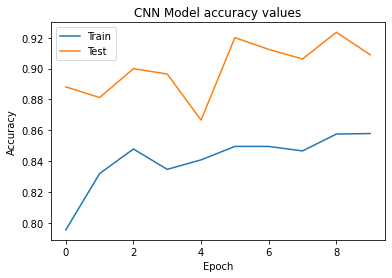

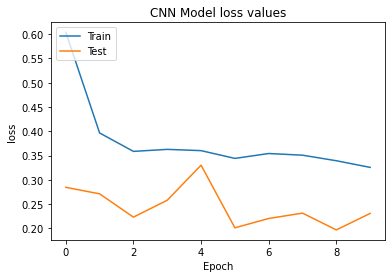

In [14]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('CNN Model loss values')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show() 

## Evaluate 

In [15]:
test_loss, test_acc = model.evaluate(valid_set, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

50/50 [==============================] - 4s 79ms/step - loss: 0.2305 - accuracy: 0.9056
test acc: 0.9056249856948853
test_loss: 0.23053525388240814


# Second Test Using Xception

In [16]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                    rotation_range=30,
                                    shear_range=0.3,
                                    zoom_range=0.3,
                                    horizontal_flip=True,
                                   )
train_set = train_datagen.flow_from_directory('./train',
                                                 target_size = (249, 249),
                                                 batch_size = 64,
                                                 class_mode = 'binary'
                                             )

vaild_datagen= ImageDataGenerator(rescale=1./255)
valid_set = vaild_datagen.flow_from_directory('./valid',
                                                 target_size = (249, 249),
                                                 batch_size = 64,
                                                 class_mode = 'binary')


Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [17]:
model = Sequential()
model.add(Xception(include_top=False, pooling='avg', weights='imagenet', input_shape=target_size))
model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

In [18]:
model.summary()
model.compile(optimizer= 'Adam', loss = 'binary_crossentropy', metrics= 'accuracy')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_11 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 2048)              4196352   
                                                                 
 batch_normalization_12 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 1024)             

In [19]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
                                             save_best_only = True,
                                             monitor= 'val_accuracy',
                                             mode = 'max')

In [20]:
epochs = 10 
batch_size=512
history2 = model.fit(train_set, epochs = epochs, validation_data = valid_set,
                    steps_per_epoch= len(train_set.filenames)//batch_size,
                    validation_steps= len(valid_set.filenames)//batch_size,
                    callbacks= [checkpoint]
                    )

Epoch 1/10
91/91 [==============================] - 51s 529ms/step - loss: 0.5493 - accuracy: 0.8295 - val_loss: 0.2837 - val_accuracy: 0.9105
Epoch 2/10
91/91 [==============================] - 48s 526ms/step - loss: 0.3268 - accuracy: 0.8690 - val_loss: 0.2581 - val_accuracy: 0.9048
Epoch 3/10
91/91 [==============================] - 48s 527ms/step - loss: 0.3050 - accuracy: 0.8697 - val_loss: 0.2362 - val_accuracy: 0.9325
Epoch 4/10
91/91 [==============================] - 47s 516ms/step - loss: 0.3044 - accuracy: 0.8748 - val_loss: 0.2096 - val_accuracy: 0.9183
Epoch 5/10
91/91 [==============================] - 47s 517ms/step - loss: 0.2959 - accuracy: 0.8822 - val_loss: 0.1868 - val_accuracy: 0.9261
Epoch 6/10
91/91 [==============================] - 47s 515ms/step - loss: 0.2858 - accuracy: 0.8850 - val_loss: 0.2005 - val_accuracy: 0.9240
Epoch 7/10
91/91 [==============================] - 47s 516ms/step - loss: 0.2959 - accuracy: 0.8817 - val_loss: 0.1937 - val_accuracy: 0.9205

In [9]:
test_loss, test_acc = model.evaluate(valid_set, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

NameError: name 'model' is not defined

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('CNN Model loss values')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()